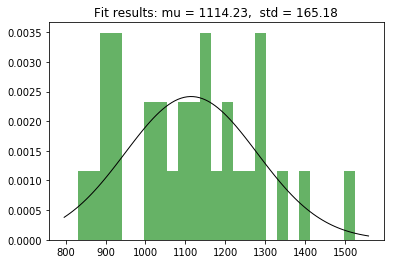

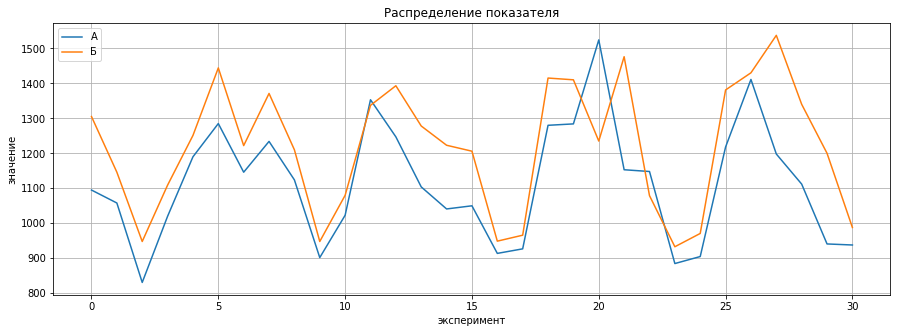

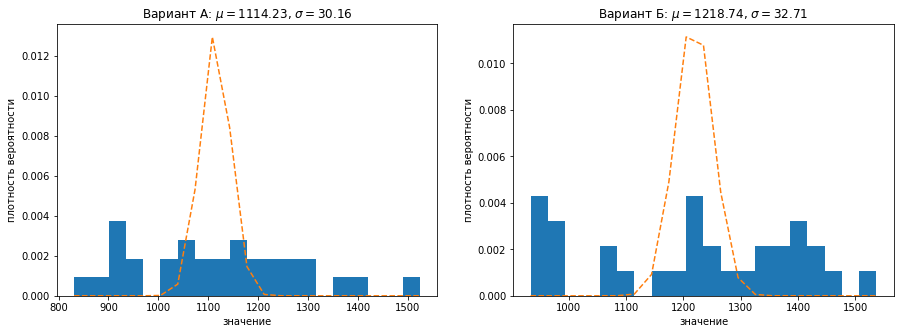

Для 95% доверительного интервала:
Получен статистически значимый результат

Изменение показат показателя:
+9.38%


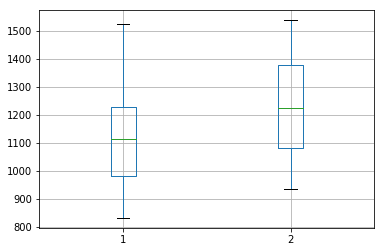

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from math import sqrt
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
from scipy.stats import norm
from termcolor import colored

pd.options.display.max_columns = 30
pd.options.display.width = 120
pd.options.display.float_format = '{:.3f}'.format

def independent_ttest(data1, data2, alpha):
    # calculate means    
    mean1, mean2 = mean(data1), mean(data2)
    
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    
    # degrees of freedom    
    df = len(data1) + len(data2) - 2
    
    # calculate the critical value    
    cv = t.ppf(1.0 - alpha, df)
    
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    
    return t_stat, df, cv, p, mean1, mean2

data = pd.read_csv("pricelib_stats.csv", sep=",", header=None)

x1 = data[1]
x2 = data[2]

# Plot the histogram.
plt.hist(x1, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(x1)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()


plt.figure(figsize=(15, 5))
plt.plot(x1)
plt.plot(x2)
plt.title('Распределение показателя')
plt.ylabel('значение')
plt.xlabel('эксперимент')
plt.legend(['A', 'Б'], loc='upper left')
plt.grid(True)
plt.show();


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# the histogram of the data
n1, bins1, patches1 = ax1.hist(x1, 20, density=1)
n2, bins2, patches2 = ax2.hist(x2, 20, density=1)

mean1 = mean(x1)
mean2 = mean(x2)
sd1 = sem(x1)
sd2 = sem(x2)

# add a 'best fit' line
y1 = ((1 / (np.sqrt(2 * np.pi) * sd1)) * np.exp(-0.5 * (1 / sd1 * (bins1 - mean1))**2))
y2 = ((1 / (np.sqrt(2 * np.pi) * sd2)) * np.exp(-0.5 * (1 / sd2 * (bins2 - mean2))**2))

ax1.plot(bins1, y1, '--')
ax1.set_xlabel('значение')
ax1.set_ylabel('плотность вероятности')
ax1.set_title("Вариант А: $\mu=" + ("%.2f" % mean1) + "$, $\sigma=" + ("%.2f" % sd1) + "$")

ax2.plot(bins2, y2, '--')
ax2.set_xlabel('значение')
ax2.set_ylabel('плотность вероятности')
ax2.set_title("Вариант Б: $\mu=" + ("%.2f" % mean2) + "$, $\sigma=" + ("%.2f" % sd2) + "$")

plt.show();

alpha = 0.05
t_stat, df, cv, p, m1, m2 = independent_ttest(x1, x2, alpha)

print("Для %s%% доверительного интервала:" % 95)

if abs(t_stat) <= cv:
    print(colored("Результат получен случайно", 'red'))
else:
    print(colored("Получен статистически значимый результат", "green"))

if m1 > m2: 
    diff = (m1/m2-1)
    color = "red"
    prefix = "-"
else:
    diff = (m2/m1-1)
    color = "green"
    prefix = "+"

print("\nИзменение показат показателя:")
print(colored(prefix + "%.2f%%" % (diff * 100), color))
    
data.boxplot(column=[1, 2]);





